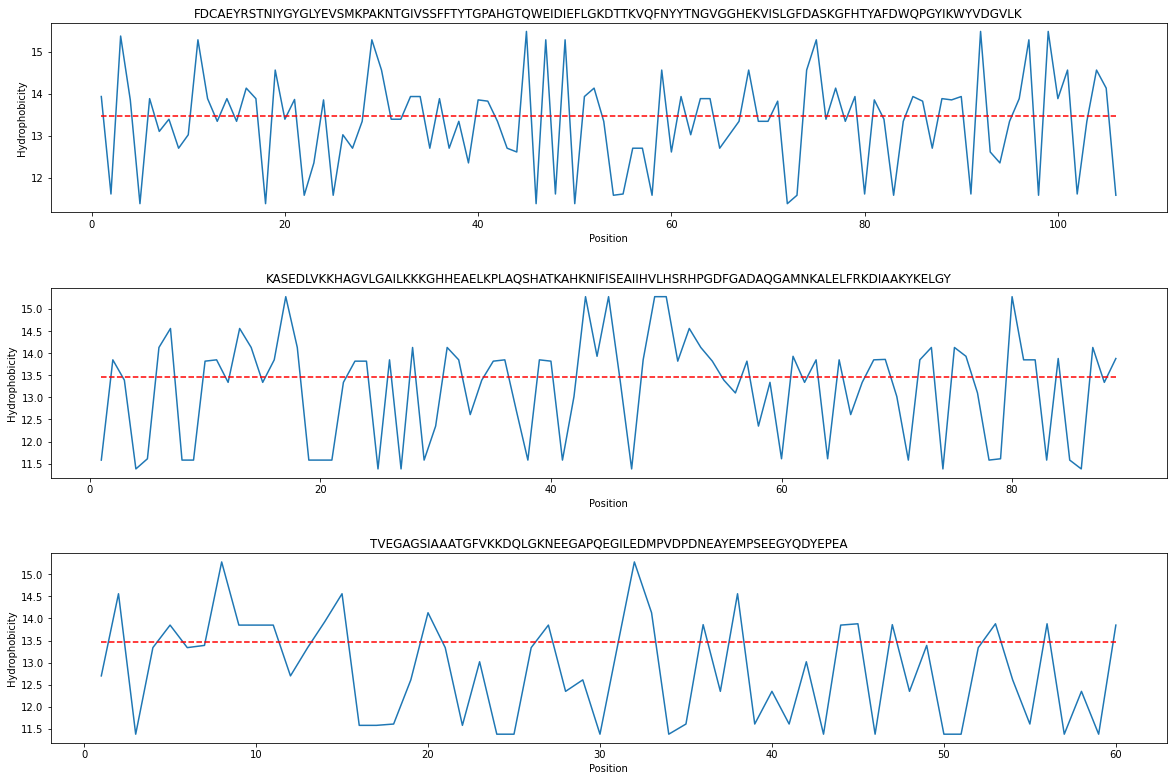

In [32]:
import matplotlib.pyplot as plt

seq = [ 
    'FDCAEYRSTNIYGYGLYEVSMKPAKNTGIVSSFFTYTGPAHGTQWEIDIEFLGKDTTKVQFNYYTNGVGGHEKVISLGFDASKGFHTYAFDWQPGYIKWYVDGVLK',
    'KASEDLVKKHAGVLGAILKKKGHHEAELKPLAQSHATKAHKNIFISEAIIHVLHSRHPGDFGADAQGAMNKALELFRKDIAAKYKELGY',
    'TVEGAGSIAAATGFVKKDQLGKNEEGAPQEGILEDMPVDPDNEAYEMPSEEGYQDYEPEA'
]

hydrophobicity = {'A': 13.85, 'D': 11.61, 'C': 15.37, 'E': 11.38, 'F': 13.93, 'G': 13.34, 'H': 13.82, 'I': 15.28, 'K': 11.58, 'L': 14.13, 'M': 13.86, 'N': 13.02, 'P': 12.35, 'Q': 12.61, 'R': 13.10, 'S': 13.39, 'T': 12.70, 'V': 14.56, 'W': 15.48, 'Y': 13.88}
avg_hydrobicity = sum(hydrophobicity.values())/len(hydrophobicity.values())


hydrophobicity_seq = []

figure, axis = plt.subplots(3)

for j in range(len(seq)):
    hydrophobicity_seq.append([hydrophobicity[i] for i in seq[j]])
    axis[j].plot([i+1 for i in range(len(seq[j]))],[hydrophobicity[i] for i in seq[j]])
    axis[j].plot([i+1 for i in range(len(seq[j]))],[avg_hydrobicity]*len(seq[j]),'r--')
    axis[j].set_title(seq[j])
    axis[j].set_xlabel('Position')
    axis[j].set_ylabel('Hydrophobicity')

plt.subplots_adjust(bottom=3.0,
                    right=0.9,
                    top=5.0,
                    wspace=0.4,
                    hspace=0.4)
figure.set_figheight(5)
figure.set_figwidth(20)
plt.show()

In [15]:
avg_hydrobicity = sum(hydrophobicity.values())/len(hydrophobicity.values())

avg_hydrobicity

13.462000000000003

In [199]:
def find_alpha(hydro_seq):
     alpha = []
     start_index = -1
     i = 0
     stop = -1
     while i < len(hydro_seq)-3:
         if hydro_seq[i] > avg_hydrobicity and hydro_seq[i+1] > avg_hydrobicity:
              if hydro_seq[i+2] < avg_hydrobicity and hydro_seq[i+3] < avg_hydrobicity:
                    stop = i+3
                    if start_index != -1:
                        i += 3
                    else:
                         start_index = i
                         i += 3
         elif hydro_seq[i] < avg_hydrobicity and hydro_seq[i+1] < avg_hydrobicity:
                #  print(I)
                 if hydro_seq[i+2] > avg_hydrobicity and hydro_seq[i+3] > avg_hydrobicity:
                    stop = i+3
                    if start_index != -1:
                        i = i+3
                    else:
                         start_index = i
                         i = i+3
         else:
                    if start_index != -1:
                         alpha.append((start_index,stop))
                         start_index = -1
                         stop = -1
         i+=1
     return alpha

find_alpha([hydrophobicity[i] for i in seq[2]])

[(5, 16), (29, 32), (41, 44)]

In [203]:
def find_beta(hydro_seq):
    beta = []
    start_index = -1
    i = 0
    prev_hydro_val = -1
    stop = -1
    while i < len(hydro_seq)-3:
         if hydro_seq[i] > avg_hydrobicity and hydro_seq[i+1] < avg_hydrobicity:
            if hydro_seq[i+2] > avg_hydrobicity and hydro_seq[i+3] < avg_hydrobicity:
                    if start_index == -1:
                        start_index = i
                    stop = i+2
         elif hydro_seq[i] < avg_hydrobicity and hydro_seq[i+1] > avg_hydrobicity:
                if hydro_seq[i+2] < avg_hydrobicity and hydro_seq[i+3] > avg_hydrobicity:
                    if start_index == -1:
                         start_index = i
                    stop = i+2
         else:
                    if start_index != -1:
                         beta.append((start_index,stop))
                         start_index = -1
                         stop = -1
         i+=1
    return beta

find_beta([hydrophobicity[i] for i in seq[0]])

[(3, 5), (11, 14), (16, 20), (33, 35), (43, 49), (57, 61), (74, 80), (89, 91)]

In [204]:
import pandas as pd


patterns_table = pd.DataFrame(columns=['seq','alpha', 'beta', 'alpha_index', 'beta_index'],index=[i+1 for i in range(len(seq))])

patterns_table['seq'] = [i+1 for i in range(len(seq))]

patterns_table['alpha'] = [find_alpha([hydrophobicity[i] for i in seq[j]]) for j in range(len(seq))]

patterns_table['beta'] = [find_beta([hydrophobicity[i] for i in seq[j]]) for j in range(len(seq))]

patterns_table

,seq,alpha,beta,alpha_index,beta_index
1,1,"[(8, 11), (26, 33), (37, 40), (50, 53), (62, 6...","[(3, 5), (11, 14), (16, 20), (33, 35), (43, 49...",NaN,NaN
2,2,"[(3, 10), (16, 23), (28, 43), (45, 55), (65, 7...","[(23, 27), (59, 64), (81, 83)]",NaN,NaN
3,3,"[(5, 16), (29, 32), (41, 44)]","[(34, 37), (44, 46)]",NaN,NaN


In [226]:
for item in patterns_table['alpha'].items():
    print(item)

(1, [(8, 11), (26, 33), (37, 40), (50, 53), (62, 65), (71, 74), (82, 85), (93, 96)])
(2, [(3, 10), (16, 23), (28, 43), (45, 55), (65, 72), (74, 77)])
(3, [(5, 16), (29, 32), (41, 44)])


In [225]:
for item in patterns_table['beta'].items():
    print(item)

(1, [(3, 5), (11, 14), (16, 20), (33, 35), (43, 49), (57, 61), (74, 80), (89, 91)])
(2, [(23, 27), (59, 64), (81, 83)])
(3, [(34, 37), (44, 46)])


In [222]:
def alpha_amphipathic_index(alpha, window_size, hydro_seq):
    alpha_index = []
    for i in alpha:
        if (i[1] - i[0] + 1) % window_size == 0:
            alpha_index.append((abs(sum([hydro_seq[j] for j in range(i[0], i[1]+1, 3)])+sum([hydro_seq[j] for j in range(i[0]+1, i[1]+1, 3)])-sum([hydro_seq[j] for j in range(i[0]+2, i[1]+1, 3)])-sum([hydro_seq[j] for j in range(i[0]+4, i[1]+1, 3)]))/window_size, i))
        elif (i[1] - i[0] + 1) > window_size:
            for j in range(0, (i[1] - i[0] + 1) - window_size + 1, window_size):
                alpha_index.append((abs(sum([hydro_seq[j] for j in range(i[0]+j, i[0]+j+window_size+1, 3)])+sum([hydro_seq[j] for j in range(i[0]+1+j, i[0]+j+window_size+1, 3)])-sum([hydro_seq[j] for j in range(i[0]+2+j, i[0]+j+window_size+1, 3)])-sum([hydro_seq[j] for j in range(i[0]+4+j,i[0]+j+window_size+1, 3)]))/window_size, (i[0]+j, i[0]+j+window_size-1)))
    return alpha_index


In [220]:
def beta_amphipathic_index(beta, window_size, hydro_seq):
    beta_index = []
    for i in beta:
        if (i[1] - i[0] + 1) % window_size == 0:
            print(hydro_seq[i[0]:i[1]+1], i[0])
            beta_index.append((abs(sum([hydro_seq[j] for j in range(i[0], i[1]+1, 2)])-sum([hydro_seq[j] for j in range(i[0]+1, i[1]+1, 2)]))/window_size, i))
        elif (i[1] - i[0] + 1) > window_size:
            for k in range(0, (i[1] - i[0] + 1) - window_size + 1, window_size):
                beta_index.append((abs(sum([hydro_seq[j] for j in range(i[0]+k, i[0]+k+window_size, 2)])-sum([hydro_seq[j] for j in range(i[0]+1+k+window_size, i[0]+1+k+window_size, 2)]))/window_size, (i[0]+j, i[0]+j+window_size-1)))
    return beta_index

In [223]:
patterns_table['alpha_index'] = [alpha_amphipathic_index(patterns_table['alpha'][i+1], 8, hydrophobicity_seq[i]) for i in range(len(seq))]
patterns_table['beta_index'] = [beta_amphipathic_index(patterns_table['beta'][i+1], 6, hydrophobicity_seq[i]) for i in range(len(seq))]

patterns_table

[11.61, 13.93, 13.34, 13.85, 11.61, 13.85] 59


,seq,alpha,beta,alpha_index,beta_index
1,1,"[(8, 11), (26, 33), (37, 40), (50, 53), (62, 6...","[(3, 5), (11, 14), (16, 20), (33, 35), (43, 49...","[(3.232499999999999, (26, 33))]","[(5.933333333333334, (45, 50)), (7.22333333333..."
2,2,"[(3, 10), (16, 23), (28, 43), (45, 55), (65, 7...","[(23, 27), (59, 64), (81, 83)]","[(3.2075000000000014, (3, 10)), (3.73625000000...","[(0.8450000000000001, (59, 64))]"
3,3,"[(5, 16), (29, 32), (41, 44)]","[(34, 37), (44, 46)]","[(1.2774999999999999, (5, 12))]",[]


In [224]:
for item in patterns_table['alpha_index'].items():
    print(item)

(1, [(3.232499999999999, (26, 33))])
(2, [(3.2075000000000014, (3, 10)), (3.736250000000001, (16, 23)), (2.4212500000000023, (28, 43)), (1.640000000000001, (45, 52)), (3.5287500000000005, (65, 72))])
(3, [(1.2774999999999999, (5, 12))])


In [217]:
for item in patterns_table['beta_index'].items():
    print(item)

(1, [(5.933333333333334, (45, 50)), (7.223333333333334, (76, 81))])
(2, [(0.8450000000000001, (59, 64))])
(3, [])
